<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Text-of-exercise-10-chapter-3-ISLRv2-book" data-toc-modified-id="Text-of-exercise-10-chapter-3-ISLRv2-book-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Text of exercise 10 chapter 3 ISLRv2 book</a></span></li><li><span><a href="#Data-reading-and-preprocessing" data-toc-modified-id="Data-reading-and-preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data reading and preprocessing</a></span></li><li><span><a href="#item-a:-Multiple-Linear-Regression-(MLR)-for-Sales-on-{Price,-Urban,-US}" data-toc-modified-id="item-a:-Multiple-Linear-Regression-(MLR)-for-Sales-on-{Price,-Urban,-US}-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>item a: Multiple Linear Regression (MLR) for <code>Sales</code> on {<code>Price</code>, <code>Urban</code>, <code>US</code>}</a></span><ul class="toc-item"><li><span><a href="#Conclusions:" data-toc-modified-id="Conclusions:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Conclusions:</a></span><ul class="toc-item"><li><span><a href="#let's-see-if-we-used-MLR-prediction-at-maximum" data-toc-modified-id="let's-see-if-we-used-MLR-prediction-at-maximum-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>let's see if we used MLR prediction at maximum</a></span></li></ul></li><li><span><a href="#Conclusions:" data-toc-modified-id="Conclusions:-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Conclusions:</a></span></li></ul></li><li><span><a href="#items-b-&amp;-c-&amp;-d" data-toc-modified-id="items-b-&amp;-c-&amp;-d-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>items b &amp; c &amp; d</a></span></li><li><span><a href="#item-d:-t_statistics-for-each-parameter" data-toc-modified-id="item-d:-t_statistics-for-each-parameter-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>item d: t_statistics for each parameter</a></span><ul class="toc-item"><li><span><a href="#Conclusions:" data-toc-modified-id="Conclusions:-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Conclusions:</a></span></li></ul></li><li><span><a href="#items-e-&amp;-f:-Multiple-Linear-Regression-(MLR)-for-Sales-on-{Price,US}-only" data-toc-modified-id="items-e-&amp;-f:-Multiple-Linear-Regression-(MLR)-for-Sales-on-{Price,US}-only-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>items e &amp; f: Multiple Linear Regression (MLR) for <code>Sales</code> on {<code>Price</code>,<code>US</code>} only</a></span></li><li><span><a href="#Conclusions:" data-toc-modified-id="Conclusions:-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusions:</a></span></li><li><span><a href="#item-g:-confidencial-interval-for-each-parameter" data-toc-modified-id="item-g:-confidencial-interval-for-each-parameter-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>item g: confidencial interval for each parameter</a></span></li><li><span><a href="#item-d:-Outliers" data-toc-modified-id="item-d:-Outliers-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>item d: Outliers</a></span></li><li><span><a href="#<<<-END-OF-DOCUMENT->>>" data-toc-modified-id="<<<-END-OF-DOCUMENT->>>-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>&lt;&lt;&lt; END OF DOCUMENT &gt;&gt;&gt;</a></span></li></ul></div>

# Text of exercise 10 chapter 3 ISLRv2 book

This question should be answered using the Carseats data set.

(a) Fit a multiple regression model to predict Sales using Price, Urban, and US.

(b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

(c) Write out the model in equation form, being careful to handle the qualitative variables properly.

(d) For which of the predictors can you reject the null hypothesis $H_0 :\ \ β_j = 0$?

(e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

(f) How well do the models in (a) and (e) fit the data?

(g) Using the model from (e), obtain 95% confidence intervals for
the coefficient(s).

(h) Is there evidence of outliers or high leverage observations in the model from (e)?

\*) **ISLRv2** stands for: **An Introduction to Statistical Learning book by Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani**

In [1]:
import datetime as dt
start_run = dt.datetime.now()

import math
import pandas as pd
import numpy as np
import scipy.stats as statmath 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

import matplotlib.pyplot as plt
import seaborn as sns

# Data reading and preprocessing

In [2]:
df = pd.read_csv('datasets/Carseats.csv')
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes


In [3]:
df['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [4]:
def ShelveLoc_encoding_f(pdS):
    '''
    actually instead of splitting into 2 binary fields (as recommended for several values qualitative field), 
    by leaving one field {-1,0,1} we keep in the model the idea that Medium is between Good and Bad, and that Good is a +
    this would make the interpretation more intuitive (hopefully - shall see!)
    '''
    if pdS == 'Good': return 1
    elif pdS == 'Bad': return -1
    elif pdS == 'Medium': return 0
    else: 
        print('Unexpected value in ShelveLoc-field:', pdS)
        return None

df['ShelveLoc'] = df['ShelveLoc'].apply(ShelveLoc_encoding_f)

In [5]:
df['Urban'].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [6]:
df['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [7]:
def YN_to_TF_f(pdS):
    if pdS == 'Yes': return 1
    elif pdS == 'No': return 0
    else: 
        print('Unexpected value in Yes/No-field:', pdS)
        return None

df['Urban'] = df['Urban'].apply(YN_to_TF_f)
df['US'] = df['US'].apply(YN_to_TF_f)

In [8]:
df.info()
df.describe().drop(index=['25%','75%'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int64  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int64  
 10  US           400 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 34.5 KB


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,-0.027500,53.322500,13.900000,0.705000,0.645000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,0.672961,16.200297,2.620528,0.456614,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,-1.000000,25.000000,10.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,0.000000,54.500000,14.000000,1.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,1.000000,80.000000,18.000000,1.000000,1.000000


# item a: Multiple Linear Regression (MLR) for `Sales` on {`Price`, `Urban`, `US`}

In [9]:
X = np.array( df[['Price','Urban','US']] )
Y = np.array(df['Sales'])

MLR_model_obj = linear_model.LinearRegression() # creating model object
MLR_model_obj.fit(X,Y)
Y_predicted = MLR_model_obj.predict(X)
beta_3 = [MLR_model_obj.intercept_]+list(MLR_model_obj.coef_)

# precision on training data:
print('\nstd (sq-root from Mean squared error):', std_3:= math.sqrt(mean_squared_error(Y, Y_predicted)), '\n' )
print('Coefficient of determination - true R^2 statistics:', R2_biased_3 := r2_score(Y, Y_predicted),'\n' )
print('Explained variance score (= R^2 statistics only when <y>=<predicted>):',
      R2_no_bias_3 := explained_variance_score(Y, Y_predicted), '\n')
print('Check if <y>=<predicted>:', np.mean(Y), '=?=', np.mean(Y_predicted), 'delta =', np.mean(Y_predicted) - np.mean(Y) )


std (sq-root from Mean squared error): 2.4600989164099034 

Coefficient of determination - true R^2 statistics: 0.23927539218405547 

Explained variance score (= R^2 statistics only when <y>=<predicted>): 0.23927539218405547 

Check if <y>=<predicted>: 7.496325000000001 =?= 7.496325000000001 delta = 0.0


## Conclusions:
1. from initial std(Y)= 2.824 after building prediction on linear f(x) we got final std(Y-Y_predicted)=2.460 only!
2. R^2 statistics also shows that the effect of regressing {Price, Urban, US} to Sales is not much effective.

### let's see if we used MLR prediction at maximum

In [10]:
X = np.array( df.drop(columns='Sales') )
Y = np.array(df['Sales'])

MLR_model_obj = linear_model.LinearRegression() # creating model object
MLR_model_obj.fit(X,Y)
Y_predicted = MLR_model_obj.predict(X)

# precision on training data:
print('\nstd (sq-root from Mean squared error):', std_all:= math.sqrt(mean_squared_error(Y, Y_predicted)), '\n' )
print('Coefficient of determination - true R^2 statistics:', R2_biased_all := r2_score(Y, Y_predicted),'\n' )
print('Explained variance score (= R^2 statistics only when <y>=<predicted>):',
      R2_no_bias_all := explained_variance_score(Y, Y_predicted), '\n')
print('Check if <y>=<predicted>:', np.mean(Y), '=?=', np.mean(Y_predicted), 'delta =', np.mean(Y_predicted) - np.mean(Y) )


std (sq-root from Mean squared error): 1.029812477687645 

Coefficient of determination - true R^2 statistics: 0.866697398568264 

Explained variance score (= R^2 statistics only when <y>=<predicted>): 0.866697398568264 

Check if <y>=<predicted>: 7.496325000000001 =?= 7.496324999999998 delta = -2.6645352591003757e-15


## Conclusions:
3. The choice of prediction parameters was far from optimal - other parameters can potentially give R^2 = 0.867 instead of 0.239 got using {Price, Urban, US}

# items b & c & d

In [11]:
def sign_str(x):
    if x < 0: return '-'
    else: return '+'
    
print('\nThe sales approximation function is:\n\n'.upper(), '<Sales> = (', round(beta_3[0],5), 
                                              sign_str(beta_3[2]), round(abs(beta_3[2]),5), '[if Urban]',
                                              sign_str(beta_3[3]), round(abs(beta_3[3]),5), '[if US] )',
                                              sign_str(beta_3[1]), round(abs(beta_3[1]),5), '* <Price>',
      '+/-', round(std_3,5), '(1 sigma)')


THE SALES APPROXIMATION FUNCTION IS:

 <Sales> = ( 13.04347 - 0.02192 [if Urban] + 1.20057 [if US] ) - 0.05446 * <Price> +/- 2.4601 (1 sigma)


# item d: t_statistics for each parameter
alas, there is no params like t-statistics (or f-) in the library model - so we might go for some bootstrapping:

In [12]:
def random_one_half_df(df, rng = np.random.default_rng()):  # random sampling for 1/2 rows from df
    n = len(df)//2
    rows_list = []
    while len(rows_list) < n:
        candidate = rng.integers(len(df))
        if candidate not in rows_list:  rows_list.append(candidate)
    return df.loc[rows_list]

sample_MLR_model_obj = linear_model.LinearRegression() # creating model object
beta_j = []                                            # here we save MLR parameters for random samples

bootstrap_n = 2*len(df)                                # the more - the better, yet it is getting long
for i in range(bootstrap_n):                     
    sample_df = random_one_half_df(df)
    x = np.array(sample_df[['Price','Urban','US']])
    y = np.array(sample_df['Sales'])
    sample_MLR_model_obj.fit(x,y)
    beta_j.append([sample_MLR_model_obj.intercept_] + list(sample_MLR_model_obj.coef_))
    
MLR_stat_df_samples = pd.DataFrame(
    beta_j,
    columns = ['intercept','Price','Urban','US']
)


In [13]:
# <restoring the model to 3-parameters>
X = np.array( df[['Price','Urban','US']] )
Y = np.array(df['Sales'])
MLR_model_obj = linear_model.LinearRegression() # creating model object
MLR_model_obj.fit(X,Y)
#<\restoring the model to 3 parameters>

print("\nLet's compare coefficients between model and bootstrapping-mean:")

confidence_df = MLR_stat_df_samples.describe().iloc[[0,1,2]].T

confidence_df['model'] = [ MLR_model_obj.intercept_] + list(MLR_model_obj.coef_)

confidence_df['delta_mean_to_model'] = confidence_df['mean'] - confidence_df['model']

confidence_df['delta_vs_std/sqroot(N)'] = (confidence_df['delta_mean_to_model'] / confidence_df['std'] * 
                                           math.sqrt(len(df)) ).map(abs).map(lambda x: round(x,1))

confidence_df['t_stat_v1'] = confidence_df['mean'] / (confidence_df['std'] / confidence_df['count'].map(math.sqrt) )

confidence_df['p_value_v1'] = confidence_df['t_stat_v1'].map(lambda x: statmath.t.sf(abs(x), len(df)//2 - 1) *2)

confidence_df['(t_stat, p_value)_v2'] = [ statmath.ttest_1samp(list(MLR_stat_df_samples[bt]),0) 
                                          for bt in list(confidence_df.index) ]

round(confidence_df,5)


Let's compare coefficients between model and bootstrapping-mean:


,count,mean,std,model,delta_mean_to_model,delta_vs_std/sqroot(N),t_stat_v1,p_value_v1,"(t_stat, p_value)_v2"
intercept,800.0,13.02579,0.67026,13.04347,-0.01768,0.5,549.67496,0.00000,"(549.6749649881463, 0.0)"
Price,800.0,-0.05424,0.00533,-0.05446,0.00022,0.8,-287.74842,0.00000,"(-287.74841818170484, 0.0)"
Urban,800.0,-0.02530,0.25385,-0.02192,-0.00338,0.3,-2.81844,0.00531,"(-2.818438513735605, 0.004945045021951063)"
US,800.0,1.19626,0.25600,1.20057,-0.00431,0.3,132.16950,0.00000,"(132.16950462173182, 0.0)"


## Conclusions:
1. $H_0$ can be surely rejected for $\beta_0,\ \beta_{price}\ \mbox{and}\ \beta_{us}$.
2. For $\beta_{urban}$ the confidence level for $H_0$ is 89.4% only. 

# items e & f: Multiple Linear Regression (MLR) for `Sales` on {`Price`,`US`} only

In [14]:
X = np.array( df[['Price','US']] )
Y = np.array(df['Sales'])

MLR_model_obj = linear_model.LinearRegression() # creating model object
MLR_model_obj.fit(X,Y)
Y_predicted = MLR_model_obj.predict(X)
beta_2 = [MLR_model_obj.intercept_]+list(MLR_model_obj.coef_)

# precision on training data:
print('\nstd (sq-root from Mean squared error):', std_2:= math.sqrt(mean_squared_error(Y, Y_predicted)), '\n' )
print('Coefficient of determination - true R^2 statistics:', R2_biased_2 := r2_score(Y, Y_predicted),'\n' )
print('Explained variance score (= R^2 statistics only when <y>=<predicted>):',
      R2_no_bias_2 := explained_variance_score(Y, Y_predicted), '\n')
print('Check if <y>=<predicted>:', np.mean(Y), '=?=', np.mean(Y_predicted), 'delta =', np.mean(Y_predicted) - np.mean(Y) )

print('\nThe NEW sales approximation function is:\n\n'.upper(), '<Sales> = (', round(beta_2[0],5), 
                                              sign_str(beta_2[2]), round(abs(beta_2[2]),5), '[if US] )',
                                              sign_str(beta_2[1]), round(abs(beta_2[1]),5), '* <Price>',
      '+/-', round(std_2,5), '(1 sigma)')

print('\nThe OLD sales approximation function is:\n\n'.upper(), '<Sales> = (', round(beta_3[0],5), 
                                              sign_str(beta_3[2]), round(abs(beta_3[2]),5), '[if Urban]',
                                              sign_str(beta_3[3]), round(abs(beta_3[3]),5), '[if US] )',
                                              sign_str(beta_3[1]), round(abs(beta_3[1]),5), '* <Price>',
      '+/-', round(std_3,5), '(1 sigma)')


std (sq-root from Mean squared error): 2.460119134208168 

Coefficient of determination - true R^2 statistics: 0.23926288842678567 

Explained variance score (= R^2 statistics only when <y>=<predicted>): 0.23926288842678567 

Check if <y>=<predicted>: 7.496325000000001 =?= 7.496325000000001 delta = 0.0

THE NEW SALES APPROXIMATION FUNCTION IS:

 <Sales> = ( 13.03079 + 1.19964 [if US] ) - 0.05448 * <Price> +/- 2.46012 (1 sigma)

THE OLD SALES APPROXIMATION FUNCTION IS:

 <Sales> = ( 13.04347 - 0.02192 [if Urban] + 1.20057 [if US] ) - 0.05446 * <Price> +/- 2.4601 (1 sigma)


# Conclusions:
1. On the training data the models `a` and `e` gives the same predictional effect, except the Urban term is averaged in model `e`

# item g: confidencial interval for each parameter
alas, there is no params like t-statistics (or f-) in the library model - so we might go for some bootstrapping:

In [15]:
sample_MLR_model_obj = linear_model.LinearRegression() # creating model object
beta_j = []                                            # here we save MLR parameters for random samples

bootstrap_n = 2*len(df)                                # the more - the better, yet it is getting long
for i in range(bootstrap_n):                     
    sample_df = random_one_half_df(df)
    x = np.array(sample_df[['Price','US']])
    y = np.array(sample_df['Sales'])
    sample_MLR_model_obj.fit(x,y)
    beta_j.append([sample_MLR_model_obj.intercept_] + list(sample_MLR_model_obj.coef_))
    
MLR_stat_df_samples = pd.DataFrame(
    beta_j,
    columns = ['intercept','Price','US']
)

In [16]:
print("\nLet's compare coefficients between model and bootstrapping-mean:")

confidence_df = MLR_stat_df_samples.describe().iloc[[0,1,2]].T

confidence_df['model'] = [ MLR_model_obj.intercept_] + list(MLR_model_obj.coef_)

confidence_df['delta_mean_to_model'] = confidence_df['mean'] - confidence_df['model']

confidence_df['delta_vs_std/sqroot(N)'] = (confidence_df['delta_mean_to_model'] / confidence_df['std'] * 
                                           math.sqrt(len(df)) ).map(abs).map(lambda x: round(x,1))

confidence_df['t_stat_v1'] = confidence_df['mean'] / (confidence_df['std'] / confidence_df['count'].map(math.sqrt) )

confidence_df['p_value_v1'] = confidence_df['t_stat_v1'].map(lambda x: statmath.t.sf(abs(x), len(df)//2 - 1) *2)

confidence_df['(t_stat, p_value)_v2'] = [ statmath.ttest_1samp(list(MLR_stat_df_samples[bt]),0) 
                                          for bt in list(confidence_df.index) ]

round(confidence_df,5)


Let's compare coefficients between model and bootstrapping-mean:


,count,mean,std,model,delta_mean_to_model,delta_vs_std/sqroot(N),t_stat_v1,p_value_v1,"(t_stat, p_value)_v2"
intercept,800.0,13.01748,0.62456,13.03079,-0.01331,0.4,589.52111,0.0,"(589.521111269808, 0.0)"
Price,800.0,-0.05428,0.00522,-0.05448,0.00020,0.8,-294.32788,0.0,"(-294.3278814276421, 0.0)"
US,800.0,1.20196,0.25588,1.19964,0.00232,0.2,132.86085,0.0,"(132.8608508970775, 0.0)"


In [17]:
show_df = confidence_df.loc[:,['model','std']]
show_df['left_conf_interval_95%'] = show_df['model'] - show_df['std']*math.sqrt(2)  # actually we take 2*sigma/sqrt(2)
show_df['right_conf_interval_95%'] = show_df['model'] + show_df['std']*math.sqrt(2) # because model has used complete df

round(show_df.drop(columns=['model','std']), 3)

,left_conf_interval_95%,right_conf_interval_95%
intercept,12.148,13.914
Price,-0.062,-0.047
US,0.838,1.562


# item d: Outliers
Let's do residual values vs fitted value plot analyses:
* horisontal axis = Y_predicted / studentized
* vertical axis = Y-Y_predicted / studentized

In [18]:
df['Sales_pred'] = Y_predicted
df['Residual'] = df['Sales'] - df['Sales_pred']
df['Fitted_val_studentized'] = df['Sales_pred'] - df['Sales_pred'].mean()
df['Fitted_val_studentized'] = df['Fitted_val_studentized'] / df['Fitted_val_studentized'].std()
df['Resudual_val_studentized'] = df['Residual'] / df['Residual'].std()

In [19]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_pred,Residual,Fitted_val_studentized,Resudual_val_studentized
0,9.50,138,73,11,276,120,-1,42,17,1,1,7.693120,1.806880,0.142460,0.733550
1,11.22,111,48,16,260,83,1,65,10,1,1,9.708792,1.511208,1.601610,0.613514
2,10.06,113,35,10,269,80,0,59,12,1,1,9.872225,0.187775,1.719919,0.076232
3,7.40,117,100,4,466,97,0,55,14,1,1,8.946105,-1.546105,1.049499,-0.627682
4,4.15,141,64,3,340,128,-1,38,13,1,0,6.057656,-1.907656,-1.041456,-0.774462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,7.257299,5.312701,-0.173032,2.156829
396,6.14,139,23,3,37,120,0,55,11,0,1,7.693120,-1.553120,0.142460,-0.630529
397,7.41,162,26,12,368,159,0,40,18,1,1,5.568492,1.841508,-1.395563,0.747608
398,5.94,100,79,7,284,95,-1,50,12,1,1,9.055061,-3.115061,1.128372,-1.264640


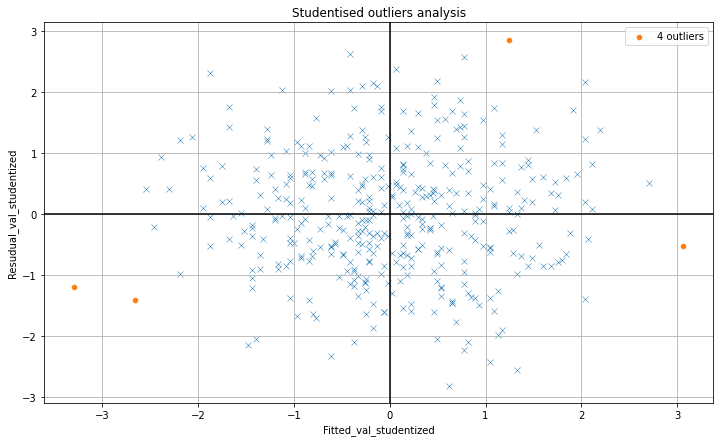

In [20]:
s = 3*3

outliers_df=df.query('Fitted_val_studentized*Fitted_val_studentized+Resudual_val_studentized*Resudual_val_studentized>@s')
inliers_df=df.query('Fitted_val_studentized*Fitted_val_studentized+Resudual_val_studentized*Resudual_val_studentized<=@s')

plt.figure(figsize=(12,7))
sns.scatterplot(data=inliers_df, x='Fitted_val_studentized', y='Resudual_val_studentized', marker='x')
sns.scatterplot(data=outliers_df, x='Fitted_val_studentized', y='Resudual_val_studentized', 
                label=str(len(outliers_df))+' outliers')

plt.axvline(x=0, color='black')
plt.axhline(y=0, color='black')
plt.title('Studentised outliers analysis')
plt.grid()
plt.legend()
plt.show()

# <<< END OF DOCUMENT >>>

In [21]:
stop_run = dt.datetime.now()
print('If you see this line, then run-all-cells command has been executed successfully!')
print('Full execution time was', round((stop_run-start_run).total_seconds(),2),'seconds. ',
     'The last run-through of this Notebook was on', stop_run.date(), 'at', str(stop_run.time()).split('.')[0] )

If you see this line, then run-all-cells command has been executed successfully!
Full execution time was 5.45 seconds.  The last run-through of this Notebook was on 2022-12-20 at 00:30:26
